In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

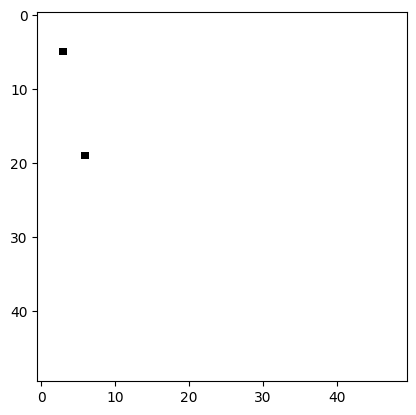

In [2]:
import cellpylib as cpl
cellular_automaton = cpl.init_simple2d(50, 50, val=0)
# During each timestep, we'll check each cell if it should be the one updated according to the
# update order. At the end of a timestep, the update order index is advanced, but if the
# update order is randomized at the end of each timestep, then this is equivalent to picking
# a cell randomly to update at each timestep.
apply_rule = cpl.AsynchronousRule(apply_rule=lambda n, c, t: 1, num_cells=(50, 50),
                                  randomize_each_cycle=True)
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=50,
                                  neighbourhood='Moore', apply_rule=apply_rule)

cpl.plot2d_animate(cellular_automaton, interval=200, autoscale=True)


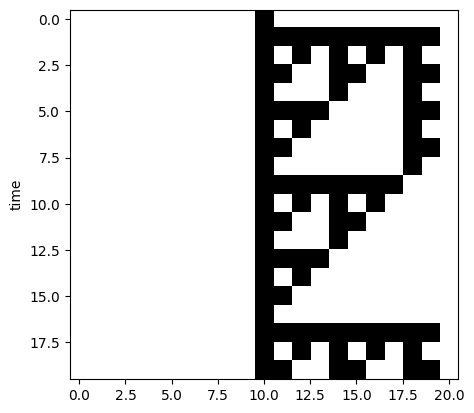

In [5]:
import cellpylib as cpl

# implements the rule 60 sequential automaton from the NKS Notes on
#   Chapter 9, section 10: "Sequential cellular automata"
#   http://www.wolframscience.com/nks/notes-9-10--sequential-cellular-automata/
cellular_automaton = cpl.init_simple(21)

apply_rule = cpl.AsynchronousRule(apply_rule=lambda n, c, t: cpl.nks_rule(n, 60), update_order=range(1, 20))

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=19*20, apply_rule=apply_rule)

# get every 19th row, including the first, as a cycle is completed every 19 rows
cpl.plot(cellular_automaton[::19])


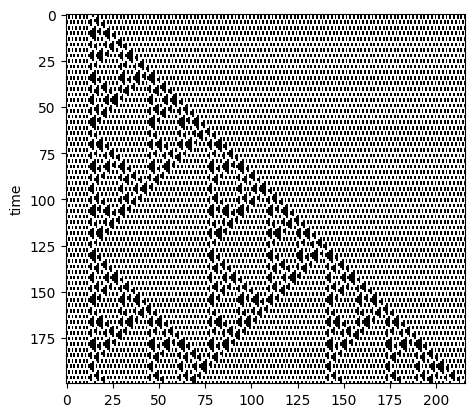

In [6]:
import cellpylib as cpl
import numpy as np

"""
Block CA at the top of NKS page 460
"""

initial_conditions = np.array([[0]*13 + [1]*2 + [0]*201])


def block_rule(n, t):
    if n == (1, 1): return 1, 1
    elif n == (1, 0): return 1, 0
    elif n == (0, 1): return 0, 0
    elif n == (0, 0): return 0, 1


ca = cpl.evolve_block(initial_conditions, block_size=2, timesteps=200, apply_rule=block_rule)

cpl.plot(ca)
